In [1]:
#Description: This program uses the three moving average crossover strategy
#             to determine when to buy and sell stock

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [4]:
#Store the data into a variable
df = pd.read_csv('TSLA.csv')

#Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-07-22,2016-07-22,44.397999,44.900002,43.776001,44.453999,44.453999,12898500
2016-07-25,2016-07-25,44.453999,46.278000,44.273998,46.001999,46.001999,22453500
2016-07-26,2016-07-26,45.537998,46.000000,45.060001,45.902000,45.902000,17150000
2016-07-27,2016-07-27,45.868000,46.672001,45.383999,45.698002,45.698002,14445000
2016-07-28,2016-07-28,45.590000,46.152000,45.320000,46.122002,46.122002,12095500
...,...,...,...,...,...,...,...
2021-07-15,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
2021-07-16,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800
2021-07-19,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100
2021-07-20,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700


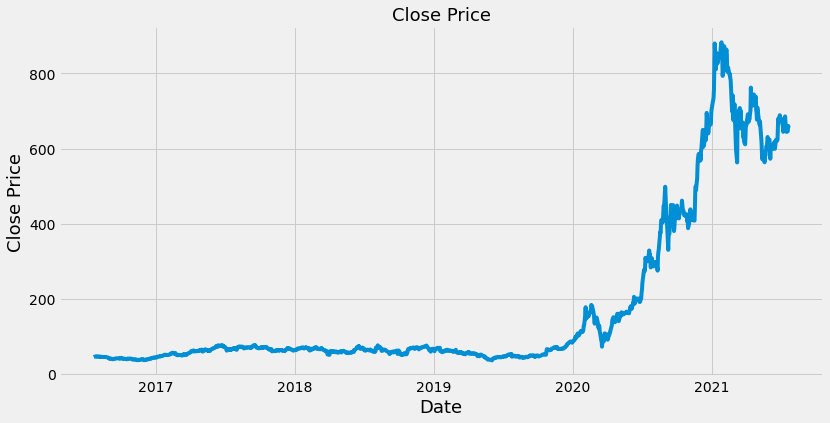

In [5]:
#Visually show the close price
plt.figure(figsize=(12.2, 6))
plt.title('Close Price', fontsize =18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [6]:
#Calculate the three moving averages
#Calculate the short/fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
#Calculate the Middle/Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
#Calculate the long/slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust = False).mean()

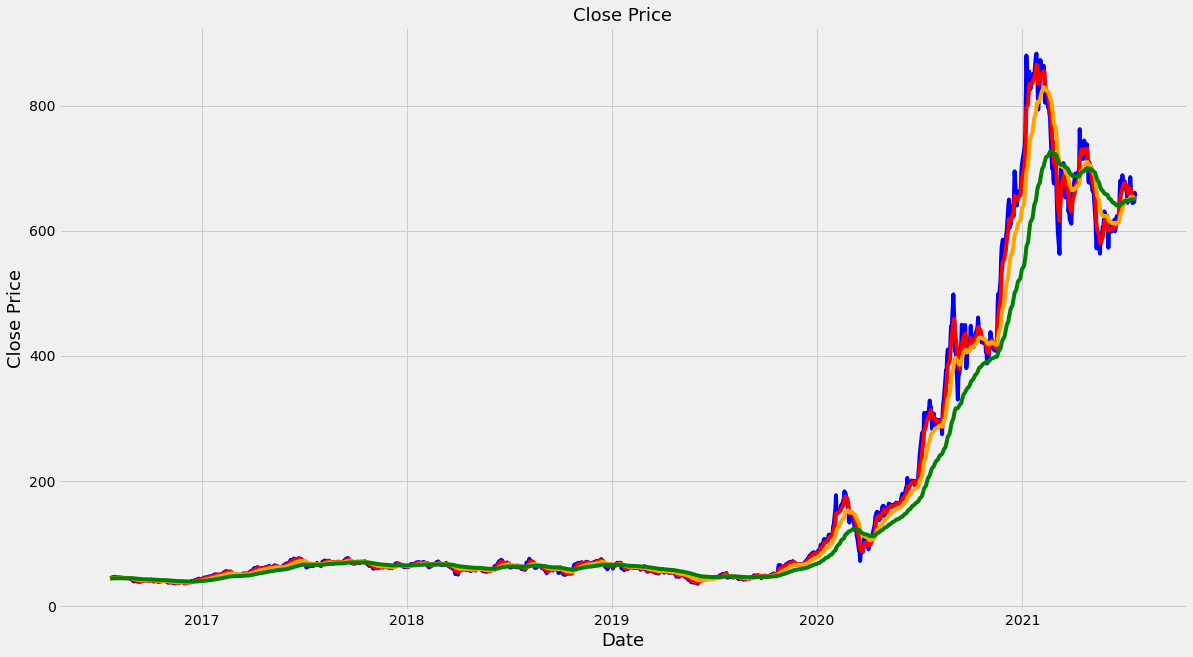

In [7]:
#Visualize the closing price and the exponential moving averages
plt.figure(figsize=(18, 10))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color= 'blue')
plt.plot(ShortEMA, label = 'Short/Fast EMA', color='red')
plt.plot(MiddleEMA, label ='Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label='Long/Slow EMA', color='green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [8]:
#Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle']= MiddleEMA
df['Long']= LongEMA

In [9]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2016-07-22,2016-07-22,44.397999,44.900002,43.776001,44.453999,44.453999,12898500,44.453999,44.453999,44.453999
2016-07-25,2016-07-25,44.453999,46.278000,44.273998,46.001999,46.001999,22453500,44.969999,44.594726,44.502374
2016-07-26,2016-07-26,45.537998,46.000000,45.060001,45.902000,45.902000,17150000,45.280666,44.713569,44.546112
2016-07-27,2016-07-27,45.868000,46.672001,45.383999,45.698002,45.698002,14445000,45.419778,44.803063,44.582109
2016-07-28,2016-07-28,45.590000,46.152000,45.320000,46.122002,46.122002,12095500,45.653853,44.922967,44.630231
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600,658.871649,653.992862,650.204036
2021-07-16,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800,653.987756,653.104417,650.017034
2021-07-19,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100,651.398494,652.478558,649.898376
2021-07-20,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700,654.432330,653.207780,650.229677


In [11]:
#Create the function to buy and sell the stock
def buy_sell_function(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  
  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False

    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list, sell_list)

  


In [12]:
#Add the buy and sell signals to the data set
df['Buy']= buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

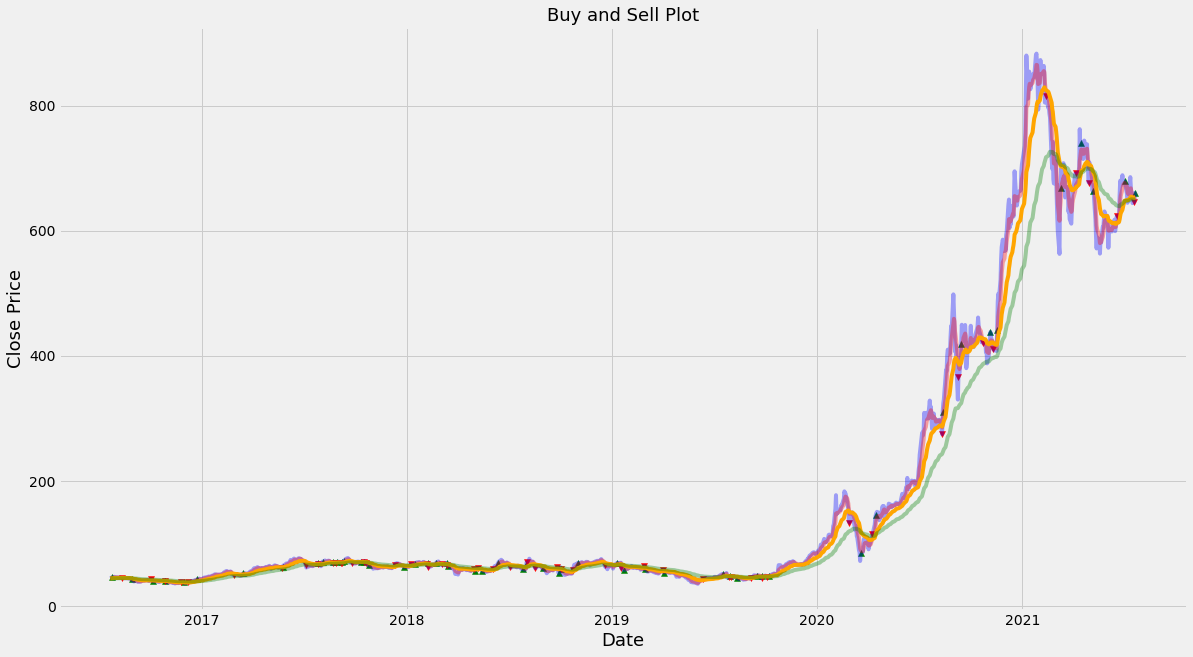

In [14]:
#Visually show the stock buy and sell signals

plt.figure(figsize=(18, 10))
plt.title('Buy and Sell Plot', fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color= 'blue', alpha=0.35)
plt.plot(ShortEMA, label = 'Short/Fast EMA', color='red', alpha=0.35)
plt.plot(MiddleEMA, label ='Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()